In [45]:
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
import numpy as np
import tqdm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pl.Config.set_tbl_cols(None)

from jormund import *
setup_plots()

np.random.seed(13)

In [33]:
def plot_wn(series):
    plt.figure(figsize=(12, 4))

    plt.plot(range(len(series)), series, marker='o', linestyle='-')
    
    plt.xlabel('Batch', fontsize=12)
    plt.ylabel('values', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [34]:
def adf(series):
    adf_result = adfuller(series, autolag='AIC')
    
    print('Augmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    for key, value in adf_result[4].items():
        print(f'Critical Value ({key}): {value}')

In [44]:
def kpss_local(series):
    kpss_result = kpss(series, regression='c', nlags="auto")
    
    print('\nKPSS Test:')
    print(f'KPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    for key, value in kpss_result[3].items():
        print(f'Critical Value ({key}): {value}')

# Normal White Noise

In [38]:
random_normal_numbers = generate_normal_wn(100) # ~N(0,1)
random_normal_numbers.head()

0   -0.031992
1    1.052721
2   -1.363281
3   -0.321706
4   -0.009375
dtype: float64

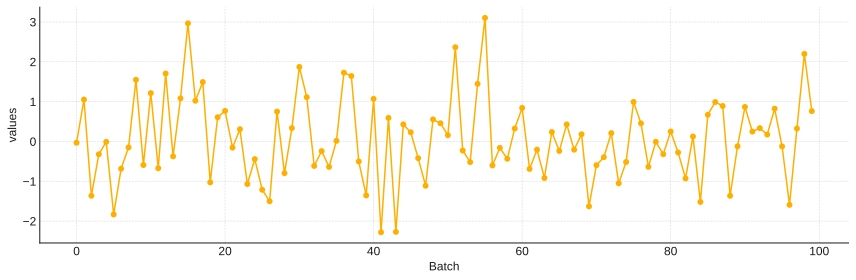

In [39]:
plot_wn(random_normal_numbers)

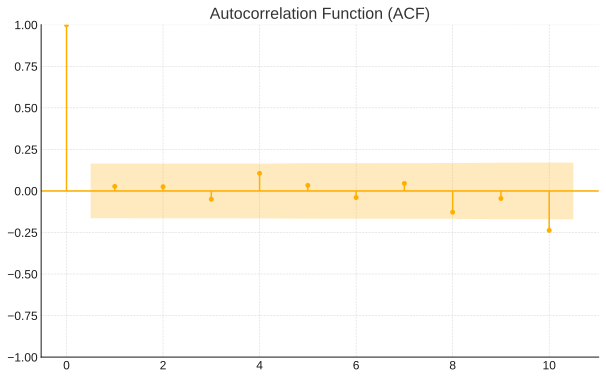

In [40]:
plot_acf(random_normal_numbers, lags=10, alpha=0.1) # White noise band => 1/(n**0.5), so 0.1 for 100 data
plt.title('Autocorrelation Function (ACF)')
plt.show()

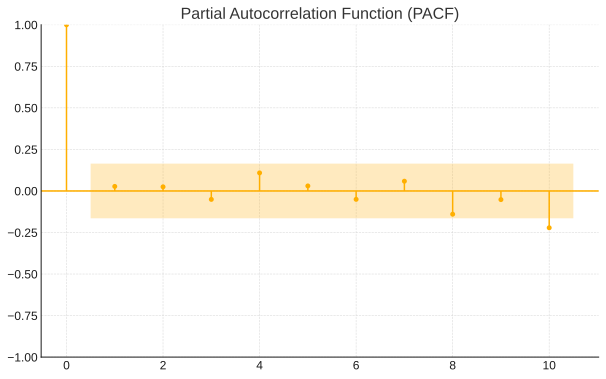

In [41]:
plot_pacf(random_normal_numbers, lags=10, alpha=0.1) # White noise band => 1/(n**0.5), so 0.1 for 100 data
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [42]:
# ADF Test
# Null Hypothesis (H₀): The time series is non-stationary, indicating a unit root.
# Alternative Hypothesis (H₁): The time series is stationary (it does not have a unit root).
# Since white noise process is stationary the test statistic should be really small and the p-value should be very close to 0.

adf_result = adfuller(random_normal_numbers, autolag='AIC')

# Since white noise process is stationary the test statistic should be really small and the p-value should be very close to 0.
print('Augmented Dickey-Fuller Test:')
print(f'ADF Statistic: {adf_result[0]}') # For stationarity the value should be smaller than the critical value.
print(f'p-value: {adf_result[1]}') # Should be smaller than 0.05 to reject the H₀
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value}')

Augmented Dickey-Fuller Test:
ADF Statistic: -9.561026313005556
p-value: 2.425756924092016e-16
Critical Value (1%): -3.498198082189098
Critical Value (5%): -2.891208211860468
Critical Value (10%): -2.5825959973472097


In [46]:
# KPSS Test
# Null Hypothesis (H₀): The time series is level(or trend) stationary (it does not have a unit root).
# Alternative Hypothesis (H₁): The time series is difference stationary.

kpss_result = kpss(random_normal_numbers, regression='c', nlags="auto")

# Since white noise process is stationary the p-value should be higher than the threshold (commonly 0.05).
print('\nKPSS Test:')
print(f'KPSS Statistic: {kpss_result[0]}') # For stationarity the value should be smaller than the critical value.
print(f'p-value: {kpss_result[1]}') # Should be higher than 0.05 to reject the H₁
for key, value in kpss_result[3].items():
    print(f'Critical Value ({key}): {value}')


KPSS Test:
KPSS Statistic: 0.0640227225494114
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


# UniformWhite Noise

In [4]:
random_uniform_numbers = generate_uniform_wn(100)
random_uniform_numbers.head()

0    0.696725
1    0.963098
2    0.277722
3    0.233626
4    0.845672
dtype: float64

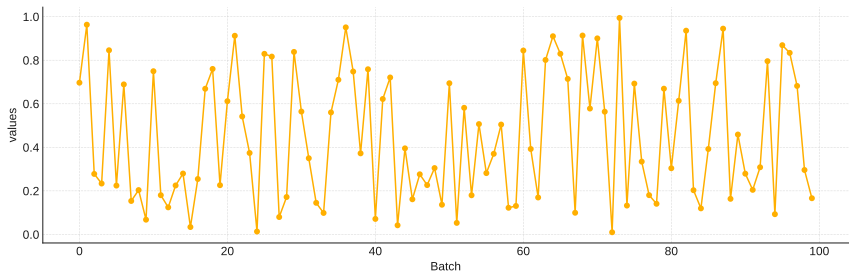

In [47]:
plot_wn(random_uniform_numbers)

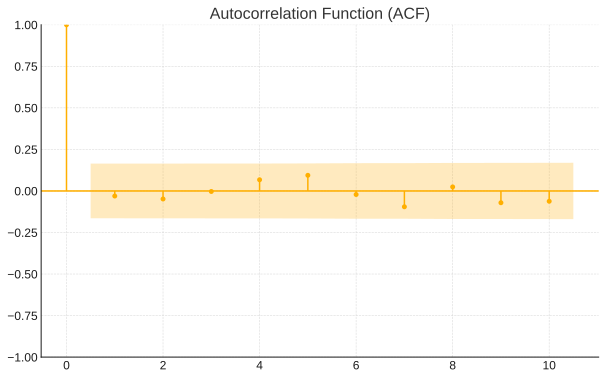

In [49]:
plot_acf(random_uniform_numbers, lags=10, alpha=0.1)
plt.title('Autocorrelation Function (ACF)')
plt.show()

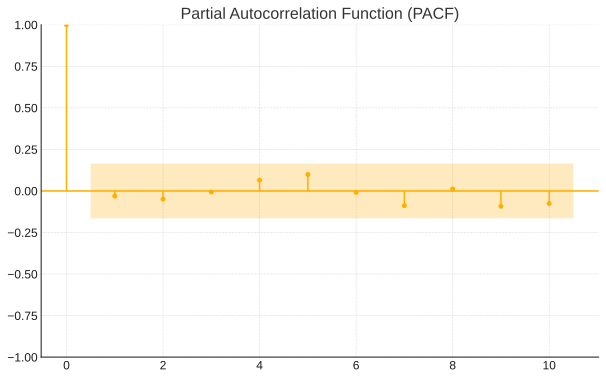

In [50]:
plot_pacf(random_uniform_numbers, lags=10, alpha=0.1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [48]:
adf(random_uniform_numbers)

Augmented Dickey-Fuller Test:
ADF Statistic: -10.146038000691403
p-value: 8.181377737098571e-18
Critical Value (1%): -3.498198082189098
Critical Value (5%): -2.891208211860468
Critical Value (10%): -2.5825959973472097


In [51]:
kpss_local(random_uniform_numbers)


KPSS Test:
KPSS Statistic: 0.08813197729246884
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


# Poisson White Noise

In [21]:
random_poisson_numbers = generate_poisson_wn(100)
random_poisson_numbers.head()

0    1
1    1
2    1
3    4
4    0
dtype: int64

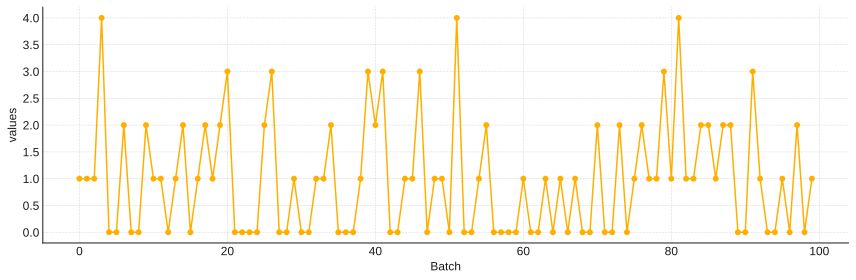

In [52]:
plot_wn(random_poisson_numbers)

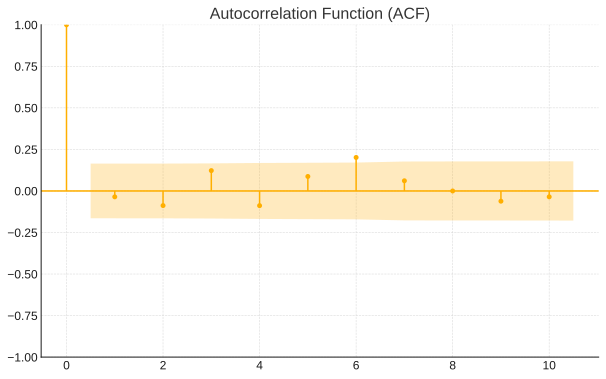

In [54]:
plot_acf(random_poisson_numbers, lags=10, alpha=0.1)
plt.title('Autocorrelation Function (ACF)')
plt.show()

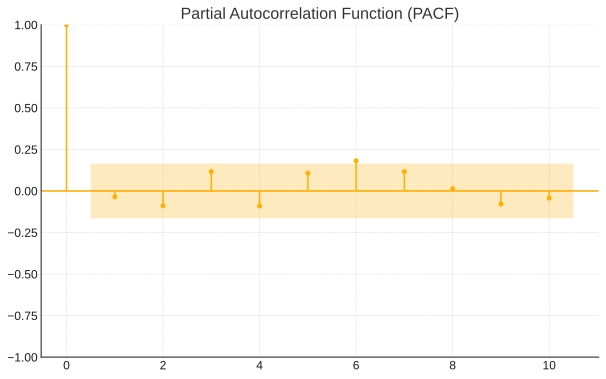

In [55]:
plot_pacf(random_poisson_numbers, lags=10, alpha=0.1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [56]:
adf(random_poisson_numbers)

Augmented Dickey-Fuller Test:
ADF Statistic: -10.204461871546759
p-value: 5.853739748475019e-18
Critical Value (1%): -3.498198082189098
Critical Value (5%): -2.891208211860468
Critical Value (10%): -2.5825959973472097


In [57]:
kpss_local(random_poisson_numbers)


KPSS Test:
KPSS Statistic: 0.08199088290831412
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


# Cauchy White Noise

In [27]:
random_cauchy_numbers = generate_cauchy_wn(100)
random_cauchy_numbers.head()

0      2.160303
1    140.008541
2     -1.570559
3     -0.259107
4     -3.183032
dtype: float64

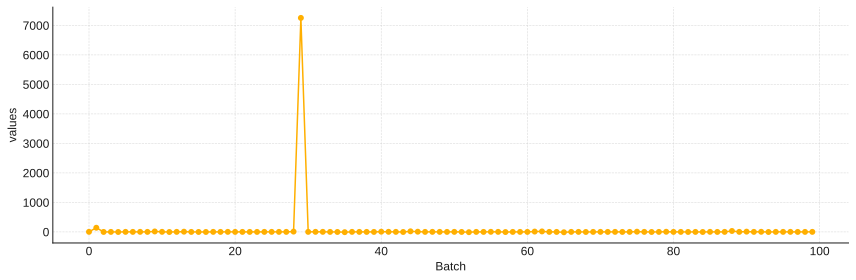

In [59]:
plot_wn(random_cauchy_numbers)

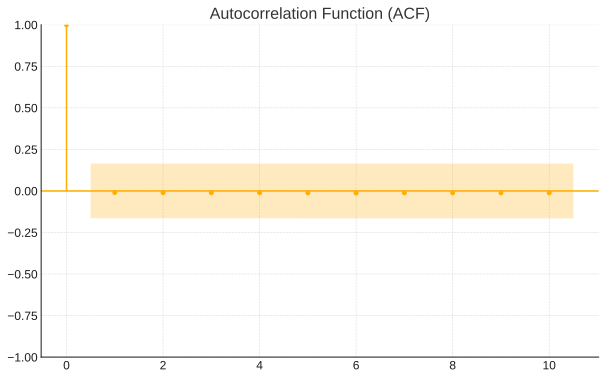

In [29]:
plot_acf(random_cauchy_numbers, lags=10, alpha=0.1)
plt.title('Autocorrelation Function (ACF)')
plt.show()

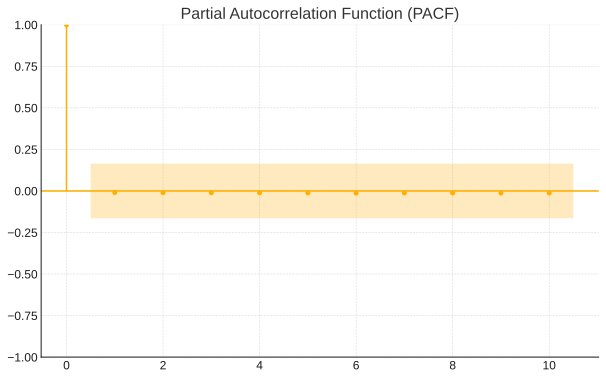

In [30]:
plot_pacf(random_cauchy_numbers, lags=10, alpha=0.1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [60]:
adf(random_cauchy_numbers)

Augmented Dickey-Fuller Test:
ADF Statistic: -9.94065704480782
p-value: 2.669869072837601e-17
Critical Value (1%): -3.498198082189098
Critical Value (5%): -2.891208211860468
Critical Value (10%): -2.5825959973472097


In [61]:
kpss_local(random_cauchy_numbers)


KPSS Test:
KPSS Statistic: 0.12945224286803253
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
